In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams.update({'font.size': 10}) # Set global font size to 18

SAMPLING_PERIOD = 50 * 10**(-3)
TRANSMISSION_RATIO = 8.89
WHEEL_RADIUS = 20.5 * 2.54 / 2 / 100
PI = 3.1415
MS_TO_KPH = 3.6

# Function to pad a dataframe with zeros to a given length
def pad_with_zeros(df, target_len):
    idx = 0
    if len(df) < target_len:
        n_missing = target_len - len(df)
        zero_rows = pd.DataFrame(0, index=range(n_missing), columns=df.columns)
        zero_rows['index'] = range(len(df), len(df) + n_missing)
        
        df = pd.concat([df, zero_rows], ignore_index=True)
    return df

dataset_path = "./data/dados_telemetria/teste_oficina_12_11/"

motion_state = pd.read_csv(f'{dataset_path}/76_MOTION_STATE.csv')
torque_ctrl = pd.read_csv(f'{dataset_path}/78_TORQUE_CTRL.csv')
wheel_spd = pd.read_csv(f'{dataset_path}/79_WHEEL_SPD.csv')
left_motor_info_1 = pd.read_csv(f'{dataset_path}/85_LEFT_MOTOR_INFO_1.csv')
left_motor_info_2 = pd.read_csv(f'{dataset_path}/86_LEFT_MOTOR_INFO_2.csv')
left_motor_info_3 = pd.read_csv(f'{dataset_path}/87_LEFT_MOTOR_INFO_3.csv')
left_motor_info_4 = pd.read_csv(f'{dataset_path}/88_LEFT_MOTOR_INFO_4.csv')

right_motor_info_1 = pd.read_csv(f'{dataset_path}/95_RIGHT_MOTOR_INFO_1.csv')
right_motor_info_2 = pd.read_csv(f'{dataset_path}/96_RIGHT_MOTOR_INFO_2.csv')
right_motor_info_3 = pd.read_csv(f'{dataset_path}/97_RIGHT_MOTOR_INFO_3.csv')
right_motor_info_4 = pd.read_csv(f'{dataset_path}/98_RIGHT_MOTOR_INFO_4.csv')


acceletromer = pd.read_csv(f'{dataset_path}/259_ACCELEROMETER.csv')
gyroscopo = pd.read_csv(f'{dataset_path}/260_GYROSCOPE.csv')
eletrobuild_temperature = pd.read_csv(f'{dataset_path}/261_ELETROBUILD_TEMPERATURE.csv')

stack1_voltage = pd.read_csv(f'{dataset_path}/300_STACK_1_VOLTAGE.csv')
stack2_voltage = pd.read_csv(f'{dataset_path}/301_STACK_2_VOLTAGE.csv')
stack3_voltage = pd.read_csv(f'{dataset_path}/302_STACK_3_VOLTAGE.csv')
stack4_voltage = pd.read_csv(f'{dataset_path}/303_STACK_4_VOLTAGE.csv')
stack5_voltage = pd.read_csv(f'{dataset_path}/304_STACK_5_VOLTAGE.csv')
stack6_voltage = pd.read_csv(f'{dataset_path}/305_STACK_6_VOLTAGE.csv')
accumulator_params = pd.read_csv(f'{dataset_path}/306_ACCUMULATOR_PARAMS.csv')
bms_params = pd.read_csv(f'{dataset_path}/307_BMS_PARAMS.csv')


In [50]:
# FUNCÕES AUXILIARES
def get_range_by_time(df, start_time, end_time):
    start_index = df.index[df['t'] >= start_time].tolist()[0]
    end_index = df.index[df['t'] <= end_time].tolist()[-1]
    return range(start_index, end_index + 1)

In [19]:
# identifica o tempo inicial
start_time = math.inf

for df in [motion_state, torque_ctrl, wheel_spd,
           left_motor_info_1, left_motor_info_2, left_motor_info_3, left_motor_info_4,
           right_motor_info_1, right_motor_info_2, right_motor_info_3, right_motor_info_4,
           acceletromer, gyroscopo, eletrobuild_temperature,
           stack1_voltage, stack2_voltage, stack3_voltage, stack4_voltage,
           stack5_voltage, stack6_voltage, accumulator_params, bms_params]:
    if df['date'][0] < start_time:
        start_time = df['date'][0]

for df in [motion_state, torque_ctrl, wheel_spd,
           left_motor_info_1, left_motor_info_2, left_motor_info_3, left_motor_info_4,
           right_motor_info_1, right_motor_info_2, right_motor_info_3, right_motor_info_4,
           acceletromer, gyroscopo, eletrobuild_temperature,
           stack1_voltage, stack2_voltage, stack3_voltage, stack4_voltage,
           stack5_voltage, stack6_voltage, accumulator_params, bms_params]:
       df['t'] = df['date'] - start_time

motion_state

,index,date,SPEED_AVG,STEERING_WHEEL,THROTTLE,BRAKE,5,6,7,8,t
0,0,1762968053687,0,0,0,0,0,0,0,0,116
1,1,1762968053769,0,0,0,0,0,0,0,0,198
2,2,1762968053869,0,0,0,0,0,0,0,0,298
3,3,1762968053969,0,0,0,0,0,0,0,0,398
4,4,1762968054086,0,0,0,0,0,0,0,0,515
...,...,...,...,...,...,...,...,...,...,...,...
4173,4173,1762968621363,0,0,0,0,0,0,0,0,567792
4174,4174,1762968621480,0,0,0,0,0,0,0,0,567909
4175,4175,1762968621596,0,0,0,0,0,0,0,0,568025
4176,4176,1762968621713,0,0,0,0,0,0,0,0,568142


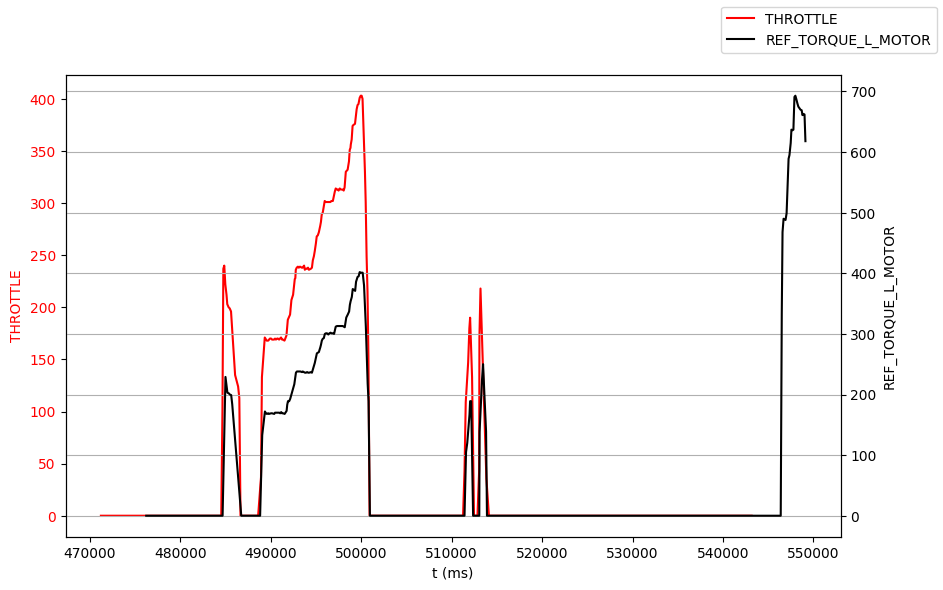

In [23]:
# plota dados raw
plot_range = range(min(len(motion_state['t']), len(torque_ctrl['t'])))
plot_range = range(3500, 4000)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(motion_state['t'][plot_range], motion_state['THROTTLE'][plot_range], label='THROTTLE', color='red')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('THROTTLE', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(torque_ctrl['t'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax2.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

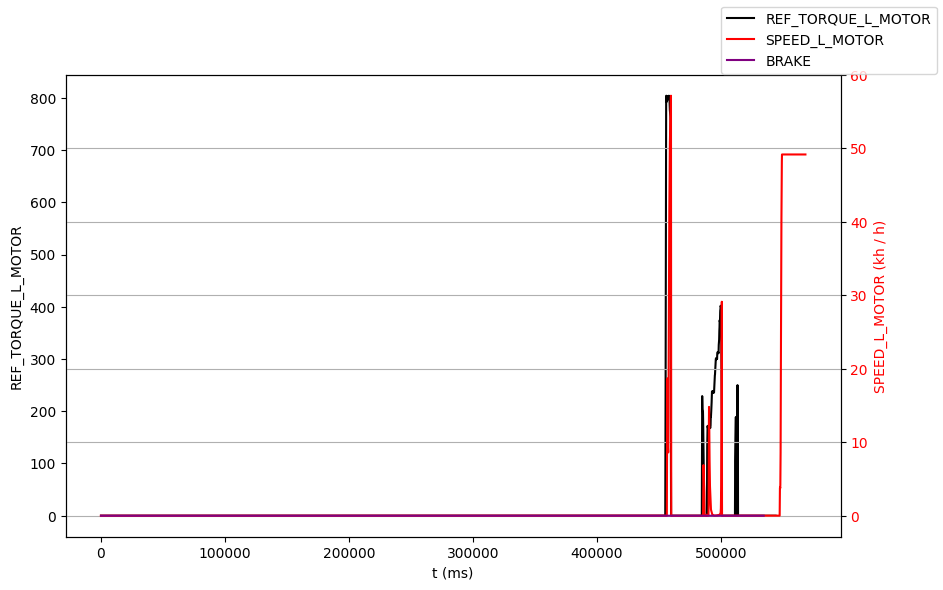

In [25]:
# plota dados raw
plot_range = range(min(len(left_motor_info_1['index']), len(torque_ctrl['index']), len(motion_state['index'])))
# plot_range = range(475, 650)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['t'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][plot_range], 
    left_motor_info_1['SPEED_L_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.plot(motion_state['t'][plot_range], motion_state['BRAKE'][plot_range] * 20, label='BRAKE', color='purple')
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

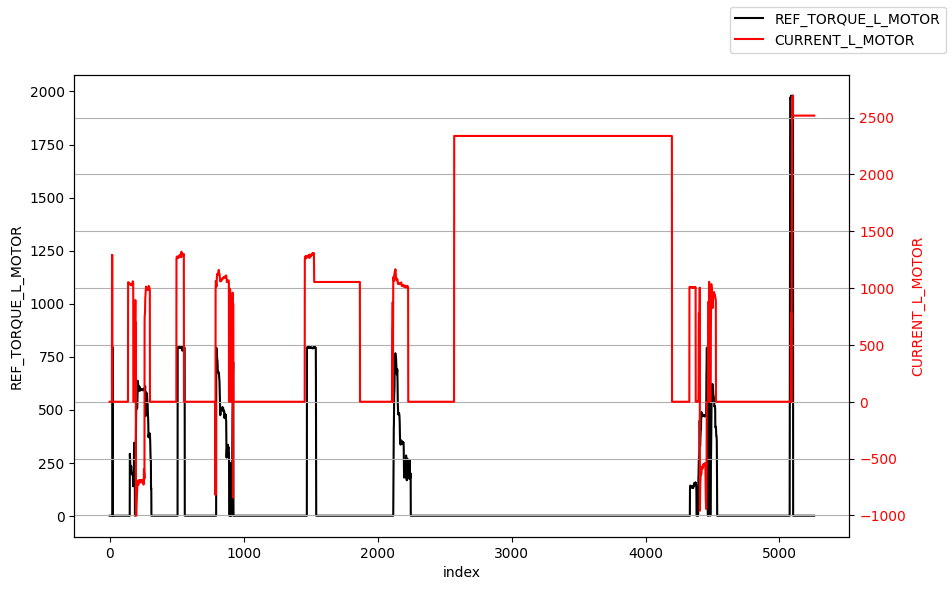

In [4]:
# plota dados raw
plot_range = range(min(len(left_motor_info_1['index']), len(torque_ctrl['index'])))
# plot_range = range(400, 600)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['index'][plot_range], 
    left_motor_info_1['CURRENT_L_MOTOR'][plot_range], 
    label='CURRENT_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('CURRENT_L_MOTOR', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

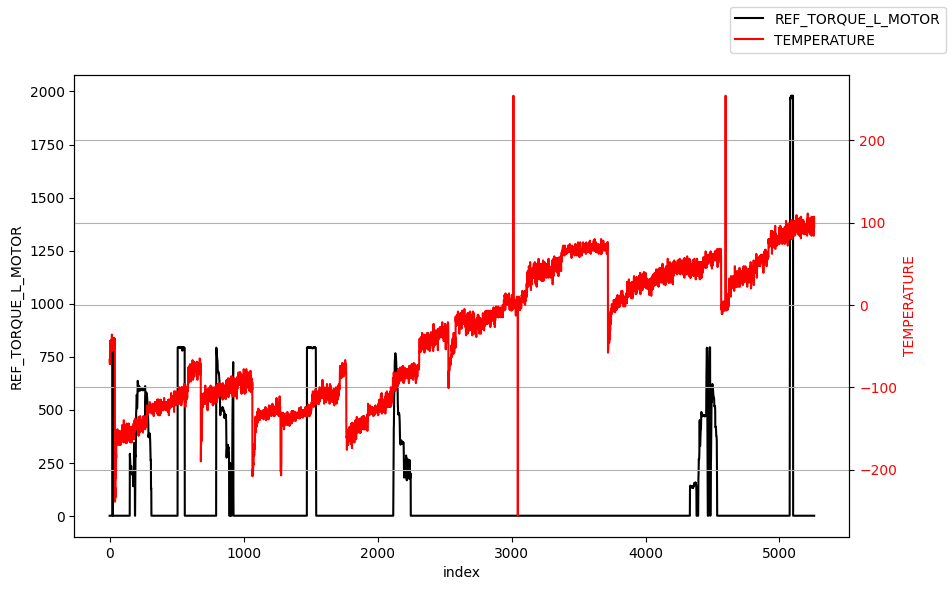

In [5]:
# plota dados raw
plot_range = range(min(len(eletrobuild_temperature['index']), len(torque_ctrl['index'])))
# plot_range = range(3700, 4200)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    eletrobuild_temperature['index'][plot_range], 
    eletrobuild_temperature['TEMPERATURE'][plot_range], 
    label='TEMPERATURE', 
    color='red'
)
ax2.set_ylabel('TEMPERATURE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

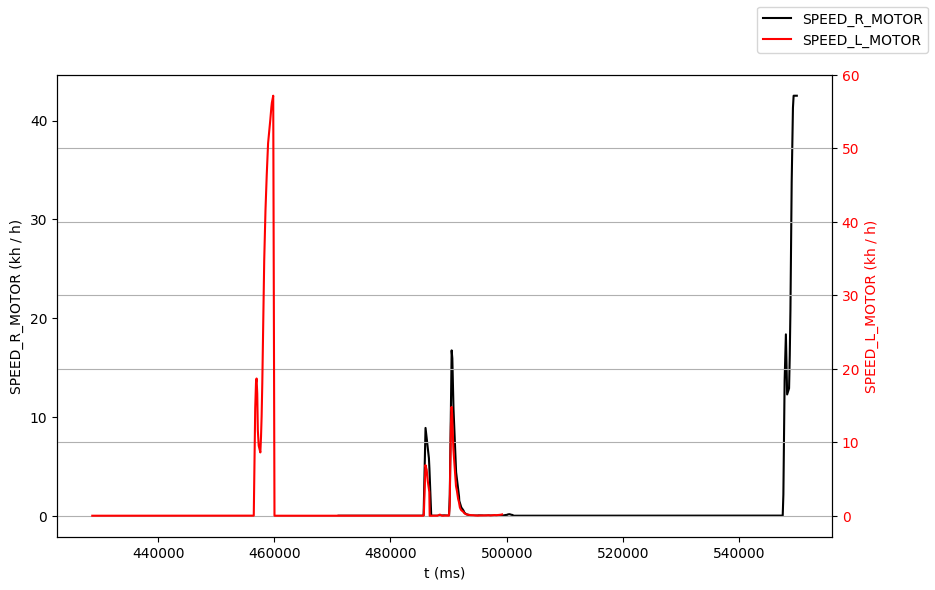

In [28]:
# analise de aceleração / desaceleração
# plota dados raw
# plot_range = range(min(len(left_motor_info_1['t']), len(right_motor_info_1['t'])))
plot_range = range(3000, 3500)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.set_xlabel('t (ms)')

ax1.plot(
    right_motor_info_1['t'][plot_range], 
    right_motor_info_1['SPEED_R_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_R_MOTOR', 
    color='black'
)
ax1.set_ylabel('SPEED_R_MOTOR (kh / h)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][plot_range], 
    left_motor_info_1['SPEED_L_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

In [31]:
accumulator_params

,index,date,MIN_VOLTAGE,MAX_VOLTAGE,TOTAL_VOLTAGE,SHUNT_CURRENT,1,2,3,4,t
0,0,1762968055153,3.32,3.18,79.1,0,0,0,0,0,1582
1,1,1762968055619,3.32,3.25,79.2,0,0,0,0,0,2048
2,2,1762968056501,3.32,3.25,79.2,0,0,0,0,0,2930
3,3,1762968056967,3.32,3.18,79.1,0,0,0,0,0,3396
4,4,1762968057433,3.32,3.25,79.2,0,0,0,0,0,3862
...,...,...,...,...,...,...,...,...,...,...,...
720,720,1762968615401,3.32,3.16,79.0,0,0,0,0,0,561830
721,721,1762968616218,3.32,3.24,79.1,0,0,0,0,0,562647
722,722,1762968617450,3.32,3.24,79.1,0,0,0,0,0,563879
723,723,1762968621214,3.32,3.24,79.1,0,0,0,0,0,567643


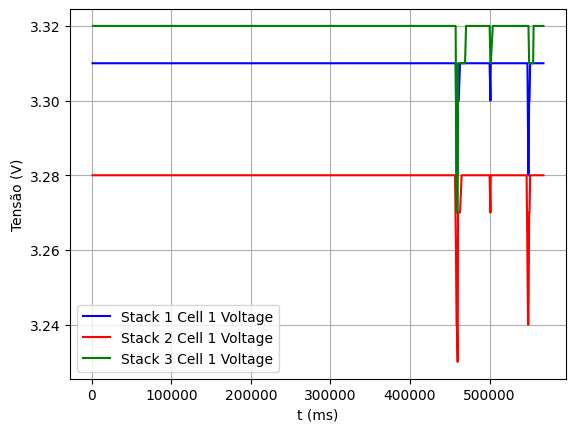

In [30]:
plot_range = range(min(len(stack1_voltage['t']), len(accumulator_params['t'])))

# plota a tensao em todas as stacks
fig, ax = plt.subplots()

# Plot the data
ax.plot(stack1_voltage['t'], stack1_voltage['CEL_1'], label='Stack 1 Cell 1 Voltage', color='blue')
ax.plot(stack2_voltage['t'], stack2_voltage['CEL_1'], label='Stack 2 Cell 1 Voltage', color='red')
ax.plot(stack3_voltage['t'], stack3_voltage['CEL_1'], label='Stack 3 Cell 1 Voltage', color='green')

# Add labels and a title
ax.set_xlabel('t (ms)')
ax.set_ylabel('Tensão (V)')

# Add a grid for better readability
ax.grid(True)
ax.legend()

# Display the plot
plt.show()

range(0, 725)


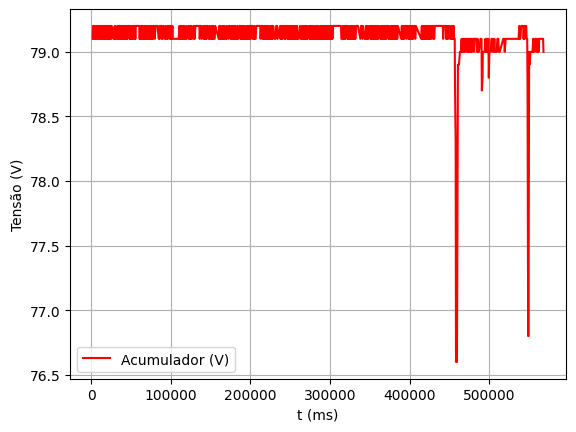

In [40]:
plot_range = range(min(len(stack1_voltage['t']), len(accumulator_params['t'])))
print(plot_range)
# plot_range = range(500, 725)

# plota a tensao em todas as stacks
fig, ax = plt.subplots()

# Plot the data
ax.plot(accumulator_params['t'][plot_range], accumulator_params['TOTAL_VOLTAGE'][plot_range], label='Acumulador (V)', color='red')

# Add labels and a title
ax.set_xlabel('t (ms)')
ax.set_ylabel('Tensão (V)')

# Add a grid for better readability
ax.grid(True)
ax.legend()

# Display the plot
plt.show()

In [48]:
accumulator_params

,index,date,MIN_VOLTAGE,MAX_VOLTAGE,TOTAL_VOLTAGE,SHUNT_CURRENT,1,2,3,4,t
0,0,1762968055153,3.32,3.18,79.1,0,0,0,0,0,1582
1,1,1762968055619,3.32,3.25,79.2,0,0,0,0,0,2048
2,2,1762968056501,3.32,3.25,79.2,0,0,0,0,0,2930
3,3,1762968056967,3.32,3.18,79.1,0,0,0,0,0,3396
4,4,1762968057433,3.32,3.25,79.2,0,0,0,0,0,3862
...,...,...,...,...,...,...,...,...,...,...,...
720,720,1762968615401,3.32,3.16,79.0,0,0,0,0,0,561830
721,721,1762968616218,3.32,3.24,79.1,0,0,0,0,0,562647
722,722,1762968617450,3.32,3.24,79.1,0,0,0,0,0,563879
723,723,1762968621214,3.32,3.24,79.1,0,0,0,0,0,567643


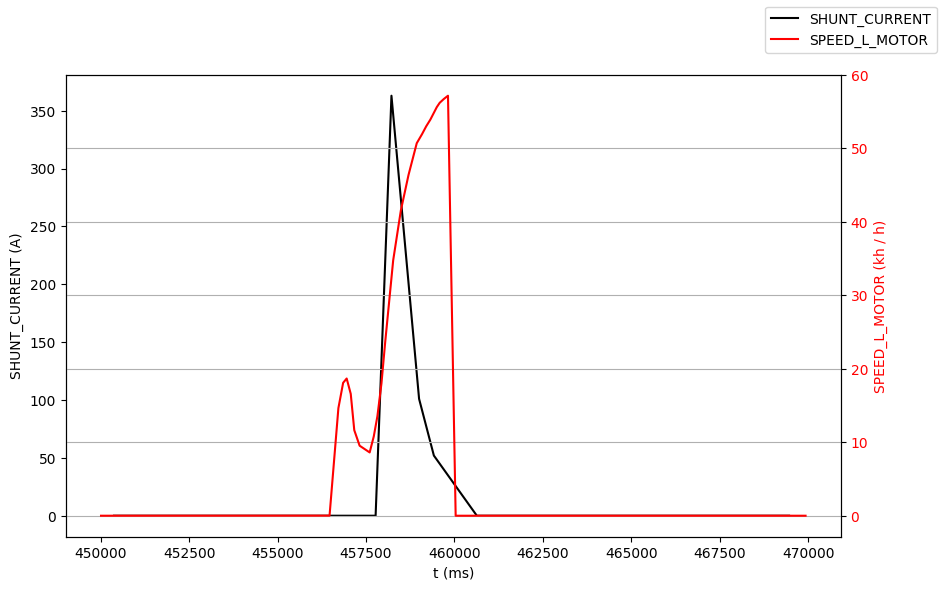

In [52]:
# plota dados raw
START_TIME = 450000
END_TIME = 470000

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(accumulator_params['t'][get_range_by_time(accumulator_params, START_TIME, END_TIME)], 
         accumulator_params['SHUNT_CURRENT'][get_range_by_time(accumulator_params, START_TIME, END_TIME)], label='SHUNT_CURRENT', color='black')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('SHUNT_CURRENT (A)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], 
    left_motor_info_1['SPEED_L_MOTOR'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()